In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

house = pd.read_csv(r'C:\Users\HP\Desktop\projects\housing.csv')
house.head()
#MEDV = median value of owner-occupied homes.
#RM = average number of rooms per dwelling.
#LSTAT = lower status of the population.
#PTRATIO = pupil-teacher ratio by town.


,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
RM         489 non-null float64
LSTAT      489 non-null float64
PTRATIO    489 non-null float64
MEDV       489 non-null float64
dtypes: float64(4)
memory usage: 15.4 KB


In [3]:
price  = house['MEDV'] #TARGET variable
features = house.drop('MEDV',axis = 1) #feature variables

In [21]:
price.head()

0    504000.0
1    453600.0
2    728700.0
3    701400.0
4    760200.0
Name: MEDV, dtype: float64

In [17]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [20]:
#data inspection
minprice = np.amin(house)
print(minprice)



RM              3.561
LSTAT           1.980
PTRATIO        12.600
MEDV       105000.000
dtype: float64


In [22]:
maxprice = np.amax(house)
print(maxprice)

RM               8.398
LSTAT           37.970
PTRATIO         22.000
MEDV       1024800.000
dtype: float64


In [24]:
meanprice = np.mean(house)
print(meanprice)

RM              6.240288
LSTAT          12.939632
PTRATIO        18.516564
MEDV       454342.944785
dtype: float64


In [25]:
stdprice = np.std(house)
print(stdprice)

RM              0.642991
LSTAT           7.074745
PTRATIO         2.109108
MEDV       165171.131544
dtype: float64


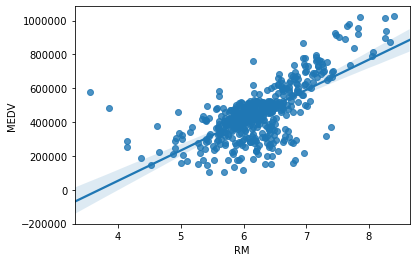

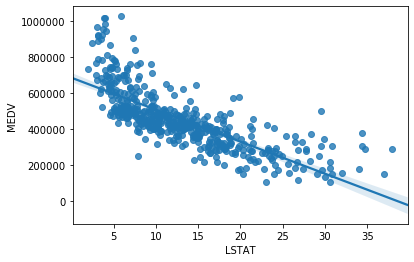

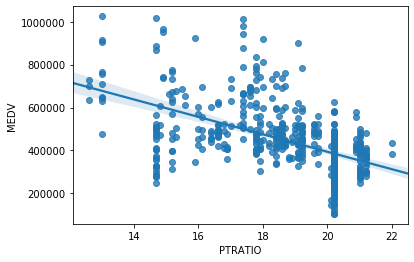

In [18]:
#visualizing your data
for var in ['RM','LSTAT','PTRATIO']:
    sns.regplot(house[var],price)
    plt.show()


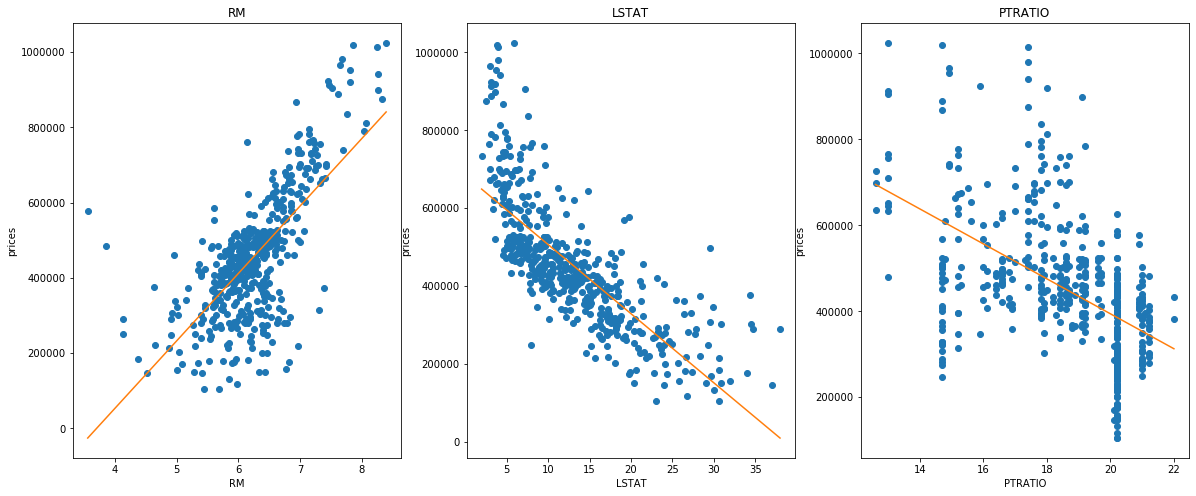

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
for i, col in enumerate(features.columns):
    plt.subplot(1,3,i+1)
    x = house[col]
    y = price
    plt.plot(x,y,'o')
    
#create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [13]:
#train test split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.20, random_state=33)


In [16]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)
reg.predict(X_test)

array([475966.42081034, 449217.35874862, 683805.74040058, 400456.74279983,
       626665.01330985, 492742.56189477, 449767.09859876, 383653.68651441,
       525295.88946478,  89618.68756671, 410791.66592861, 490756.32401222,
       631787.33890077, 658325.78614856, 269942.98602239, 364714.2839948 ,
       447080.13266954, 247592.06847407, 449579.57941034, 416579.73725033,
       603378.74284285, 622532.90665138, 674104.17876532, 577410.45991175,
       493788.49311389, 286506.7242706 , 588216.0483694 , 383839.55590841,
       381538.83354293,  46533.19674233, 377736.06254423, 517555.09425159,
       325840.90095946, 409406.36948815, 533495.49722207, 414825.53749906,
       550863.2858285 , 570065.54980995, 492856.47649105, 263236.9704742 ,
       345918.08330519, 406206.85189947, 319705.00262996, 421416.01155789,
       365109.73292456, 395064.97891148, 356210.54765643, 434277.94539879,
       348609.3482333 , 664211.11946425, 719223.02985602, 397611.18192263,
       522414.54648358, 4

In [19]:
from sklearn.metrics import r2_score
score = r2_score(y_test, prediction)
print(score)

0.30078197860712286
